In [11]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [12]:
# data=pd.read_csv('dataset.csv')
data = pd.read_excel('dataset_new.xlsx', sheet_name='test')
data

,KodeBarang,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
0,04121,5,12,8,14,40,40
1,18031,573,340,441,270,488,240
2,04161,27,5,26,34,40,56
3,04162,162,82,72,98,126,120
4,04163,23,20,9,5,22,6
...,...,...,...,...,...,...,...
101,04157,138,14,12,21,25,10
102,18104,60,103,39,87,276,40
103,18106,16,7,65,24,13,27
104,18092,721,184,150,488,648,149


In [13]:
clusters=pd.read_excel('dataset_new.xlsx',sheet_name='train')
clusters=clusters['cluster']
clusters

0      0
1      1
2      0
3      1
4      0
      ..
101    0
102    0
103    0
104    1
105    1
Name: cluster, Length: 106, dtype: int64

In [15]:
data['cluster']=clusters
data


,KodeBarang,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6,cluster
0,04121,5,12,8,14,40,40,0
1,18031,573,340,441,270,488,240,1
2,04161,27,5,26,34,40,56,0
3,04162,162,82,72,98,126,120,1
4,04163,23,20,9,5,22,6,0
...,...,...,...,...,...,...,...,...
101,04157,138,14,12,21,25,10,0
102,18104,60,103,39,87,276,40,0
103,18106,16,7,65,24,13,27,0
104,18092,721,184,150,488,648,149,1


In [6]:
model=tf.keras.models.load_model('cluster0_newdata.h5')
model1=tf.keras.models.load_model('cluster1_newdata.h5')
model2=tf.keras.models.load_model('cluster2_newdata.h5')
model3=tf.keras.models.load_model('cluster3_newdata.h5')

In [23]:
#oke ada ternyata yang cuman sendirian (1 product di cluster tersebut), kita beresin dia dulu, the easiest, dan biar keliatan kita
#ngapain aja di time series ini
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)
# ini fungsinya buat nge ubah dataset jadi windowed

# Produk di Cluster 1

In [16]:
c1 = data.query("cluster == 1")
print("Jumlah Produk:")
print(c1['KodeBarang'].size)

Jumlah Produk:
31


In [17]:
c1

,KodeBarang,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6,cluster
1,18031,573,340,441,270,488,240,1
3,04162,162,82,72,98,126,120,1
5,04150,93,107,74,87,118,79,1
7,18035,485,292,622,366,481,489,1
19,18067,0,0,0,0,0,0,1
20,18061,21,174,359,230,388,34,1
24,18085,1079,302,1596,9,114,28,1
29,18091,0,0,0,450,0,0,1
31,04006,301,254,294,122,161,216,1
32,04017,107,82,112,119,80,150,1


In [18]:
#next kita ubah bentuk data nya dari yang tadinya kesamping jadi ke bawah, tapi pertama mau aku drop dulu cluster sama kode produknya
c1=c1.drop(columns=['KodeBarang','cluster'])
c1

,bulan 1,bulan 2,bulan 3,bulan 4,bulan 5,bulan 6
1,573,340,441,270,488,240
3,162,82,72,98,126,120
5,93,107,74,87,118,79
7,485,292,622,366,481,489
19,0,0,0,0,0,0
20,21,174,359,230,388,34
24,1079,302,1596,9,114,28
29,0,0,0,450,0,0
31,301,254,294,122,161,216
32,107,82,112,119,80,150


In [19]:
#next, buat dia kayak mejeneng time series seperti biasanya, which is datanya ke bawah, tapi di average per tanggal 
new_c1=[]
time=[]
for idx,a in enumerate(c1):
    new_c1.append(c1[a].mean())
    time.append(idx)


In [20]:
#normalisasi, karena gap nya ada yang sampe ribuan, biar lebih gampang tugas ann nya
series=new_c1
min = np.min(series)
max = np.max(series)
series = series - min
series = series / (max-min)
time = np.array(time)

In [21]:
series

array([0.71988651, 1.        , 0.61129739, 0.25561001, 0.24219758,
       0.        ])

In [34]:
#buat data biar dibagi per window, jadi me masang masangkan waktu dan value,
window_size = 2
batch_size = 2

set = windowed_dataset(series, window_size, batch_size,1)

In [35]:
set

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>

In [37]:
prediksi=model1.predict(set)
prediksi

array([[0.74221766],
       [0.7422102 ],
       [0.7421574 ],
       [0.7421312 ]], dtype=float32)

In [10]:
split_time = 3 # ini berapa bulan terkahir yang mau di potong buat pengujian?

time_train = time[:-split_time]
x_train =  series[:-split_time]
time_valid =  time[-split_time:]
x_valid =  series[-split_time:]

In [12]:
x_valid

array([0.46293245, 0.16144975, 0.07907743])

In [13]:
prediksi=model.predict(time_valid)
prediksi

array([[0.3988051],
       [0.3988051],
       [0.3988051]], dtype=float32)

In [ ]:
prediksi1=model1.predict(time_valid)
prediksi1

In [ ]:
prediksi2=model2.predict(time_valid)
prediksi2

In [ ]:
prediksi3=model3.predict(time_valid)
prediksi3

In [14]:
prediksi=prediksi.flatten()
prediksi1=prediksi1.flatten()
prediksi2=prediksi2.flatten()
prediksi3=prediksi3.flatten()

In [16]:
prediksi

array([0.3988051, 0.3988051, 0.3988051], dtype=float32)

In [ ]:
prediksi1

In [ ]:
prediksi2

In [ ]:
prediksi3

In [19]:
hasil_prediksi=np.concatenate((x_train,prediksi))
hasil_prediksi

array([0.17957166, 0.22240527, 0.21911038, 0.17957166, 0.29654036,
       0.1383855 , 1.        , 0.30477759, 0.13673806, 0.05766063,
       0.723229  , 0.09390445, 0.20428336, 0.10543657, 0.48434926,
       0.51400329, 0.28336079, 0.        , 0.27512356, 0.27182867,
       0.04942339, 0.39880511, 0.39880511, 0.39880511])

In [ ]:
hasil_prediksi1=np.concatenate((x_train,prediksi1))
hasil_prediksi1

In [ ]:
hasil_prediksi2=np.concatenate((x_train,prediksi2))
hasil_prediksi2

In [ ]:
hasil_prediksi3=np.concatenate((x_train,prediksi3))
hasil_prediksi3

[]

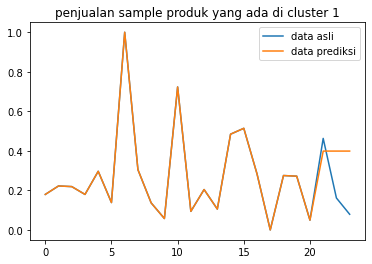

In [21]:
plt.plot(series,label='data asli')
plt.plot(hasil_prediksi,label='data prediksi')
plt.title('penjualan sample produk yang ada di cluster 1')
plt.legend()
plt.plot()

In [ ]:
plt.plot(series,label='data asli')
plt.plot(hasil_prediksi1,label='data prediksi')
plt.title('penjualan sample produk yang ada di cluster 1')
plt.legend()
plt.plot()

In [ ]:
plt.plot(series,label='data asli')
plt.plot(hasil_prediksi2,label='data prediksi')
plt.title('penjualan sample produk yang ada di cluster 1')
plt.legend()
plt.plot()

In [ ]:
plt.plot(series,label='data asli')
plt.plot(hasil_prediksi3,label='data prediksi')
plt.title('penjualan sample produk yang ada di cluster 1')
plt.legend()
plt.plot()